In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

cap = cv2.VideoCapture('./squirrel.mp4') #Replace the path with 0 to open the camera

maxCorners = 100

color = np.random.randint(0, 255, (maxCorners, 3))
feature_params = dict( maxCorners = maxCorners,
                       qualityLevel = 0.2,
                       minDistance = 7,
                       blockSize = 7
                     )


lk_params = dict( winSize = (15, 15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))
  

ret, old_frame = cap.read()
old_gray = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

p0 = cv2.goodFeaturesToTrack(old_gray, mask = None, **feature_params)
  
mask = np.zeros_like(old_frame)
while(1):
      
    ret, frame = cap.read()
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  
    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)
  
    good_new = p1[st==1]
    good_old = p0[st==1]

    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel()
        c, d = old.ravel()
        a = int(a)
        b = int(b)
        c = int(c)
        d = int(d)

        mask = cv2.line(mask, (a, b), (c, d), color[i].tolist(), 2)
        frame = cv2.circle(frame, (a, b), 5, color[i].tolist(), -1)
          
    img = cv2.add(frame, mask)
  
    cv2.imshow('frame', img)
      
    
    k = cv2.waitKey(25)
    if k == 27:
        break
  
    
    old_gray = frame_gray.copy()
    p0 = good_new.reshape(-1, 1, 2)
  
cv2.destroyAllWindows()
cap.release()

حرکت آن ها را lucas kanade هرچند برای این بخش توضیحاتی خواسته نشده بود، اما تعداد 100 نقطه از نقاطی که مستعد دنبال کردن هستند را یافته ایم و مطابق الگوریتم  
درچند فریم پشت سر هم نشان داده ایم

عدد  VideoCapture دقت کنید که شما میتوانید برای اجرا شدن الگو برروی تصویر دوربین به صورت بلادرنگ، در آرگومان ورودی   
0 قرار دهید

In [4]:
cap = cv2.VideoCapture('./dog.mp4') #Replace the path with 0 to open the camera


ret, first_frame = cap.read()
prev_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(first_frame)  

mask[..., 1] = 255

while(1):
      
    ret, frame = cap.read()
    cv2.imshow("Original Video", frame)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      
    flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
    magnitude, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
      
    
    mask[..., 0] = angle * 180 / np.pi / 2
    mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
      
    rgb = cv2.cvtColor(mask, cv2.COLOR_HSV2BGR)
      
    cv2.imshow("Dense Optical Flow", rgb)
    prev_gray = gray
    
    
    k = cv2.waitKey(25)
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()


C:\Users\padidar\AppData\Local\Temp\ipykernel_1964\37178838.py:21: RuntimeWarning: invalid value encountered in cast
  mask[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)


برروی کل تصویر پیاده کرده ایم که نتیجه را میبینید Dense در این سل نیز الگوریتم را به صورت 

بازمیگردد hsv علت آبی شدن هنگام چرخش به چپ و قرمز شدن هنگام چرخش به راست، به نحوه تعریف و خواص 

In [7]:
import os, os.path
import cv2
from sklearn.preprocessing import StandardScaler 

parent_path_surp = "../Lab1/Cohn-Kanade/surprise videos/"
parent_path_happ = "../Lab1/Cohn-Kanade/happy videos/"

videos_surp = os.listdir(parent_path_surp)
videos_happ = os.listdir(parent_path_happ)

CropAndResize = lambda img: img[55:670:2, 355:845:2]


Happy_Videos = []
Happy_labels = []

idxs = np.arange(len(videos_happ))
np.random.shuffle(idxs)
dirs = list(np.array(videos_happ)[idxs])

for idx, sub_dir in enumerate(dirs):
    directory = parent_path_happ + sub_dir + "/"
    images = os.listdir(directory)
    X = []
    for img_num, img in enumerate(images):
        pic = cv2.cvtColor(cv2.imread(directory + img), cv2.COLOR_BGR2GRAY)
        X.append(CropAndResize(pic))
    Happy_Videos.append(X)
    Happy_labels.append(0)


Surprise_Videos = []
Surprise_labels = []

idxs = np.arange(len(videos_surp))
np.random.shuffle(idxs)
dirs = list(np.array(videos_surp)[idxs])

for idx, sub_dir in enumerate(dirs):
    directory = parent_path_surp + sub_dir + "/"
    images = os.listdir(directory)
    X = []
    for img_num, img in enumerate(images):
        pic = cv2.cvtColor(cv2.imread(directory + img), cv2.COLOR_BGR2GRAY)
        X.append(CropAndResize(pic))
    Surprise_Videos.append(X)
    Surprise_labels.append(1)



در این قسمت، هر ویدیو را خوانده و هر ویدیو را به صورت یک لیست ذخیره کرده ایم. برای هر دسته مجموعه ویدیو ها را به صورت لیستی از لیست ها ذخیره کرده ایم. در همین حین عملیات ماسکه کردن و تغییر رزولوشن را نیز انجام داده ایم

In [8]:
lk_params = dict( winSize = (15, 15), maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03))

X = []
y = []

for hv in range(len(Happy_Videos)):
    prev_gray = Happy_Videos[hv][0]
    hist_list = []
    i = 1
    while True:
        gray = Happy_Videos[hv][i]
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hist = np.histogram(angle.ravel(), bins=np.linspace(0,2*np.pi,9))[0]

        hist_list.append(hist)

        prev_gray = gray

        i = i+1
        if i >= len(Happy_Videos[hv]):
            break


    
    hist_np = np.array(hist_list)
    whole_hist = np.concatenate((np.mean(hist_np, axis=0), np.max(hist_np, axis=0)))
    

    X.append(whole_hist)
    y.append(0)





for sv in range(len(Surprise_Videos)):
    prev_gray = Surprise_Videos[sv][0]
    hist_list = []
    i = 1
    while True:
        gray = Surprise_Videos[hv][i]
        flow = cv2.calcOpticalFlowFarneback(prev_gray, gray, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        mag, angle = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        hist = np.histogram(angle.ravel(), bins=np.linspace(0,2*np.pi,9))[0]

        hist_list.append(hist)

        prev_gray = gray

        i = i+1
        if i >= len(Surprise_Videos[hv]):
            break


    
    hist_np = np.array(hist_list)
    whole_hist = np.concatenate((np.mean(hist_np, axis=0), np.max(hist_np, axis=0)))
    

    X.append(whole_hist)
    y.append(1)






را مشابه سل های قبلی انجام داده ایم و البته برای تمام تصاویر هر ویدیو، برای زوایای بدست آمده از نتیجه گرادیان، هیستوگرام ترسیم کرده ایم optical flow همانطور که در فوق مشخص است، برای هر یک از دسته ها، عملیات 

را به صورت ترکیب میانگین هیستوگرام ها و ماکسیمم هیستوگرام ها (مطابق خواسته دستور کار) تعریف کرده ایم descriptor در پایان برای هر هیستوگرام مشخصه 

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_data_reshaped = np.array(X_train).reshape(len(X_train), -1)
test_data_reshaped = np.array(X_test).reshape(len(X_test), -1)

scaler = StandardScaler()
scaler.fit(train_data_reshaped)
train_data_reshaped = scaler.transform(train_data_reshaped)

scaler.fit(test_data_reshaped)
test_data_reshaped = scaler.transform(test_data_reshaped)

svm_classifier = SVC(C=100)
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


و با ویژگی یاد شده بر حسب هیستوگرام ها، توانسته ایم به دقت 100 درصد برسیم! که کاملا مناسب است SVM همانطور که در فوق مشخص است، با تعریف کلسیفایر 

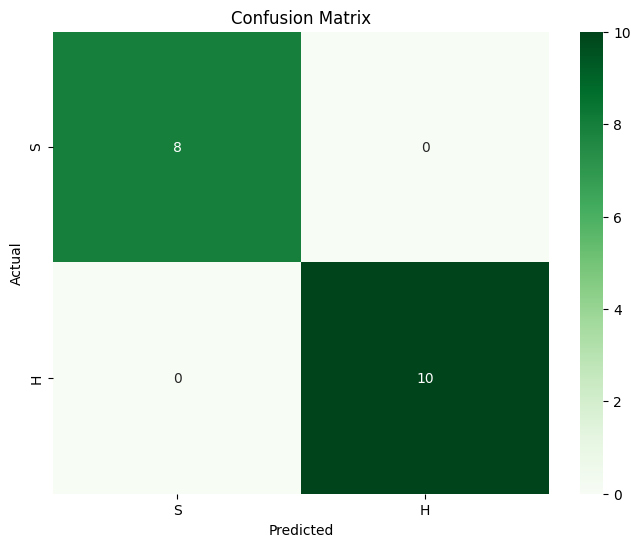

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_mat = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Greens', xticklabels="SH", yticklabels="SH")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()